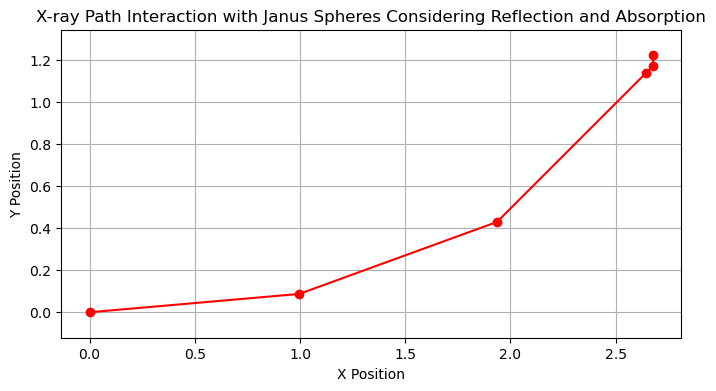

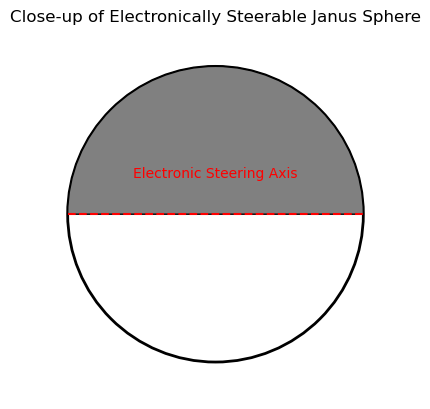

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

"""
Figure 2: Electronically Steerable Janus Sphere Visualization

This script generates a visual representation of an electronically steerable Janus sphere.
It highlights the dual-faced nature of the sphere, where one side is reflective and the other absorptive,
and the mechanical setup that allows for its rotation and tilting. This visualization is intended to
accompany the descriptions in a chapter discussing advanced x-ray steering technologies using Janus spheres.

Author: Syed Hussain Ather
Date:  5/29/2024
"""


def draw_janus_sphere():
    fig, ax = plt.subplots()
    # Drawing the sphere
    circle = patches.Circle((0.5, 0.5), 0.4, edgecolor='black', facecolor='none', linewidth=2)
    ax.add_patch(circle)
    
    # Highlighting the dual-faced nature
    half_circle = patches.Wedge(center=(0.5, 0.5), r=0.4, theta1=0, theta2=180, edgecolor='black', facecolor='grey')
    ax.add_patch(half_circle)
    
    # Adding mechanism for electronic steering
    ax.plot([0.1, 0.9], [0.5, 0.5], color='red', linestyle='--')
    ax.text(0.5, 0.6, 'Electronic Steering Axis', color='red', ha='center')
    
    ax.set_aspect('equal', 'box')
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')
    plt.title('Close-up of Electronically Steerable Janus Sphere')
    plt.show()

def rotate_vector(vector, angle_deg, reflectivity):
    """Rotate a vector by a given angle in degrees based on reflectivity."""
    if np.random.rand() <= reflectivity:
        # Reflect the vector with some probability
        angle_rad = np.radians(angle_deg)
        rotation_matrix = np.array([
            [np.cos(angle_rad), -np.sin(angle_rad)],
            [np.sin(angle_rad), np.cos(angle_rad)]
        ])
        return rotation_matrix @ vector
    else:
        # Absorb some of the x-rays or let them pass through transparently
        return vector * 0.05  # Represents significant loss or minor path continuation without direction change

def plot_xray_path(initial_direction, number_of_spheres, initial_angle, rotation_increment, reflectivity):
    """
    Plot the path of an X-ray as it interacts with a stack of Janus spheres.
    
    Args:
    initial_direction (array): The initial direction vector of the X-ray.
    number_of_spheres (int): The number of spheres the X-ray interacts with.
    initial_angle (float): The starting angle of the first sphere.
    rotation_increment (float): The incremental rotation applied to each subsequent sphere.
    reflectivity (float): The probability of x-rays being reflected by the sphere.
    """
    positions = [np.array([0, 0])]  # Starting at the origin
    direction = np.array(initial_direction)
    
    angles = [initial_angle + i * rotation_increment for i in range(number_of_spheres)]

    for angle in angles:
        new_direction = rotate_vector(direction, angle, reflectivity)
        new_position = positions[-1] + new_direction
        positions.append(new_position)
        direction = new_direction if np.linalg.norm(new_direction) > 0 else np.array([0, 0])  # Stop if absorbed

    # Convert list of positions to an array for easy plotting
    positions = np.array(positions)
    
    plt.figure(figsize=(8, 4))
    plt.plot(positions[:, 0], positions[:, 1], 'r-o')
    plt.title('X-ray Path Interaction with Janus Spheres Considering Reflection and Absorption')
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.grid(True)
    plt.axis('equal')
    plt.show()

# Example usage
plot_xray_path([1, 0], 5, 5, 10, 0.95)  # Start at 5 degrees, increment by 10 degrees, 5 spheres, 95% reflectivity


draw_janus_sphere()


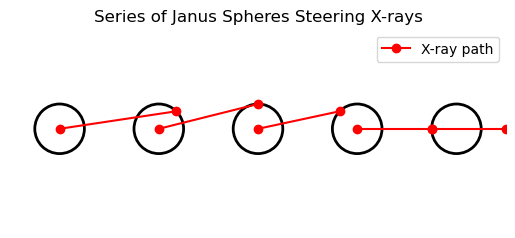

In [2]:
import numpy as np

"""
Figure 3: Series of Janus Spheres Steering X-rays

This script generates a diagram showing a series of Janus spheres steering x-rays across multiple spheres
to efficiently reach a target area. This figure is designed to visually demonstrate the concept of x-ray
path manipulation using dynamically orientable Janus spheres, as discussed in the corresponding book chapter
on advanced medical imaging technologies.

Author: Syed Hussain Ather
Date:  5/29/2024
"""


def draw_series_of_janus_spheres():
    fig, ax = plt.subplots()
    positions = np.linspace(0.1, 0.9, 5)
    angles = [0, 45, 90, 135, 180]  # Example angles for illustration
    
    x_positions = np.cos(np.radians(angles)) * 0.05 + positions
    y_positions = np.sin(np.radians(angles)) * 0.05 + 0.5

    # Draw spheres and rays
    for i, pos in enumerate(positions):
        circle = patches.Circle((pos, 0.5), 0.05, edgecolor='black', facecolor='none', linewidth=2)
        ax.add_patch(circle)
        if i > 0:
            ax.plot([positions[i-1], x_positions[i]], [0.5, y_positions[i]], 'r-o')

    # Add last part of the ray to the target
    ax.plot([x_positions[-1], 1], [y_positions[-1], 0.5], 'r-o', label='X-ray path')

    ax.set_aspect('equal', 'box')
    ax.set_xlim(0, 1)
    ax.set_ylim(0.3, 0.7)
    ax.axis('off')
    plt.title('Series of Janus Spheres Steering X-rays')
    plt.legend()
    plt.show()

draw_series_of_janus_spheres()


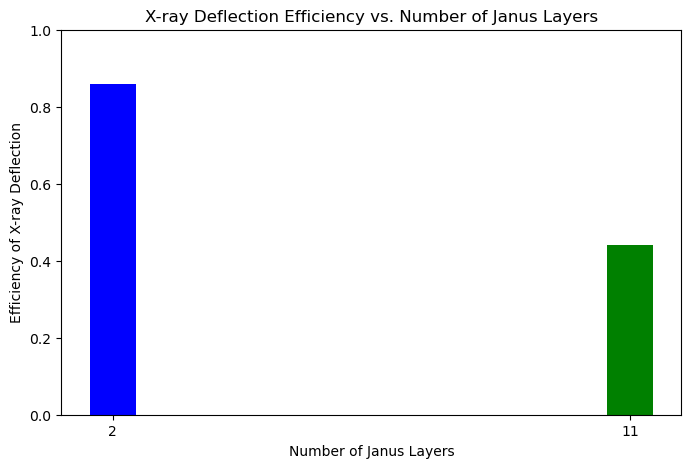

In [2]:
import matplotlib.pyplot as plt

# Author: Syed Ather
# Date: 2024-06-01
# Description: This script generates a bar chart that visualizes the deflection efficiency of X-rays using 2 and 11 Janus layers.

# Data preparation: defining the number of Janus layers and their corresponding efficiencies.
layers = [2, 11]  # Number of Janus layers tested
efficiencies = [0.86, 0.44]  # Corresponding deflection efficiencies

# Plotting setup: creating a bar chart with specific formatting.
plt.figure(figsize=(8, 5))  # Sets the size of the figure
plt.bar(layers, efficiencies, color=['blue', 'green'])  # Creates a bar chart with colors specified for each bar
plt.xlabel('Number of Janus Layers')  # Label for the x-axis
plt.ylabel('Efficiency of X-ray Deflection')  # Label for the y-axis
plt.title('X-ray Deflection Efficiency vs. Number of Janus Layers')  # Title of the plot
plt.xticks(layers)  # Ensures that only the specified layer numbers are used as x-axis ticks
plt.ylim(0, 1)  # Set the y-axis limits to show range from 0 to 1 for clarity
plt.show()  # Displays the plot
